In [2]:
import os
os.sys.path

['',
 'C:\\Users\\Sander Blomme\\Anaconda\\python36.zip',
 'C:\\Users\\Sander Blomme\\Anaconda\\DLLs',
 'C:\\Users\\Sander Blomme\\Anaconda\\lib',
 'C:\\Users\\Sander Blomme\\Anaconda',
 'C:\\Users\\Sander Blomme\\Anaconda\\lib\\site-packages',
 'C:\\Users\\Sander Blomme\\Anaconda\\lib\\site-packages\\win32',
 'C:\\Users\\Sander Blomme\\Anaconda\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\Sander Blomme\\Anaconda\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\Sander Blomme\\Anaconda\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Sander Blomme\\.ipython']

In [3]:
import os
os.sys.path

# standard packages used to handle files
import sys
import os 
import glob
import time

# commonly used library for data manipilation
import pandas as pd

# numerical
import numpy as np

# handle images - opencv
import cv2

# machine learning library
import sklearn
import sklearn.preprocessing


#used to serialize python objects to disk and load them back to memory
import pickle

#plotting
import matplotlib.pyplot as plt

# helper functions kindly provided for you by Matthias 
import helpers
# specific helper functions for feature extraction
import features

import random

# tell matplotlib that we plot in a notebook
%matplotlib notebook

"""Augment dataset & repeat everything"""

"""New filepaths"""
DATA_BASE_PATHAug = 'E:\\Allerlei\\Sander\\Andere\\School\\Universiteit\\Master\\Machine Learning\\Competition\\Phase 2\\Data'
OUTPUT_PATHAug= 'E:\\Allerlei\\Sander\\Andere\\School\\Universiteit\\Master\\Machine Learning\\Competition\\Phase 2\\Data\\Output'

DATA_TRAIN_PATHAug = os.path.join(DATA_BASE_PATHAug,'trainAug')
DATA_TEST_PATHAug = os.path.join(DATA_BASE_PATHAug,'testAug')

FEATURE_BASE_PATHAug = os.path.join(OUTPUT_PATHAug,'featuresAug')
FEATURE_TRAIN_PATHAug = os.path.join(FEATURE_BASE_PATHAug,'trainAug')
FEATURE_TEST_PATHAug = os.path.join(FEATURE_BASE_PATHAug,'testAug')

PREDICTION_PATHAug = os.path.join(OUTPUT_PATHAug,'predictionsAug')

# filepatterns to write out features
FILEPATTERN_DESCRIPTOR_TRAINAug = os.path.join(FEATURE_TRAIN_PATHAug,'train_features_{}.pkl')
FILEPATTERN_DESCRIPTOR_TESTAug = os.path.join(FEATURE_TEST_PATHAug,'test_features_{}.pkl')

# create paths in case they don't exist:
helpers.createPath(DATA_TRAIN_PATHAug)
helpers.createPath(DATA_TEST_PATHAug)
helpers.createPath(FEATURE_BASE_PATHAug)
helpers.createPath(FEATURE_TRAIN_PATHAug)
helpers.createPath(FEATURE_TEST_PATHAug)
helpers.createPath(PREDICTION_PATHAug)

# filepath constants
DATA_BASE_PATH = 'E:\\Allerlei\\Sander\\Andere\\School\\Universiteit\\Master\\Machine Learning\\Competition\\Phase 2\\Data'
OUTPUT_PATH = 'E:\\Allerlei\\Sander\\Andere\\School\\Universiteit\\Master\\Machine Learning\\Competition\\Phase 2\\Data\\Output'

DATA_TRAIN_PATH = os.path.join(DATA_BASE_PATH,'train')
DATA_TEST_PATH = os.path.join(DATA_BASE_PATH,'test')

FEATURE_BASE_PATH = os.path.join(OUTPUT_PATH,'features')
FEATURE_TRAIN_PATH = os.path.join(FEATURE_BASE_PATH,'train')
FEATURE_TEST_PATH = os.path.join(FEATURE_BASE_PATH,'test')

PREDICTION_PATH = os.path.join(OUTPUT_PATH,'predictions')

# filepatterns to write out features
FILEPATTERN_DESCRIPTOR_TRAIN = os.path.join(FEATURE_TRAIN_PATH,'train_features_{}.pkl')
FILEPATTERN_DESCRIPTOR_TEST = os.path.join(FEATURE_TEST_PATH,'test_features_{}.pkl')

# create paths in case they don't exist:
helpers.createPath(FEATURE_BASE_PATH)
helpers.createPath(FEATURE_TRAIN_PATH)
helpers.createPath(FEATURE_TEST_PATH)
helpers.createPath(PREDICTION_PATH)
helpers.createPath(DATA_TEST_PATH)
helpers.createPath(DATA_TRAIN_PATH)



In [4]:
"""Self defined functions for data analysis"""
def getAmountOfPhotosPerClass(labels, paths):
    amountOfPicturesPerClass = {}
    for label in labels:
        amountOfPicturesPerClass[label] = len(paths[label])
    
    return amountOfPicturesPerClass

#calculate average number of images with labels a list of labels you want
def avgAmountOfImagesForCertainClasses(labels, paths):
    amountOfPicturesPerClass = {}
    for label in labels:
        amountOfPicturesPerClass[label] = len(paths[label])
    
    totalphotos = 0
    for label in labels:
        totalphotos = totalphotos + amountOfPicturesPerClass[label]
    
    avgOfAllClasses = (totalphotos/len(labels))
    
    return avgOfAllClasses
    
def showAmountOfPicturesAvailalbeForTrainingPerClass(labels,paths):
    d = getAmountOfPhotosPerClass(labels,paths)
    
    height = []
    for i in d.values():
        height.append(i)
    
    bars = []
    for i in d.keys():
        bars.append(i)
    
    y_pos = np.arange(len(bars))
    # Create horizontal bars
    plt.barh(y_pos, height)
    # Create names on the y-axis
    plt.yticks(y_pos, bars)
    titlepar = {'weight' : 'bold',
            'size' : '15'}
    plt.title("Amount of pictures availalbe for training per class", **titlepar)
    yLabelPar = {'rotation' : '0',
                 'weight' : 'bold'}
    yLabel = plt.ylabel("Class", **yLabelPar)
    plt.xlabel("Amount of pictures").set_weight('bold')
    for i, v in enumerate(height):
        plt.text(v + 2.5, i - 0.2, str(v), color='black',  fontweight='bold')
    # Show graphic
    plt.show()

def getImageShape(labels, paths):
    shapes = []
    for label in labels:
        for path in paths[label]:
            image  = cv2.imread(path)
            shapes.append(image.shape)
    return shapes

def getAmountOfPixels(labels, paths):
    shapes = getImageShape(labels, paths)
    pixels=[]
    for shape in shapes:
        pixels.append(shape[0]*shape[1])
    return pixels

def showAmountOfPicturesPerPixelSizeCategory(labels,paths):
    #shapes = getImageShape(labels,paths)
    #sizes  = getImageSize(labels,paths)
    pixels = getAmountOfPixels(labels,paths)
    pixelsSorted = np.sort(pixels)
    pixelsSortedSmall = pixelsSorted/1000
    pixelsSortedSmallRound = np.round(pixelsSortedSmall, 0)
    
    AmountOfPhotosPerPixelSize = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}
    for p in pixelsSortedSmallRound:
        if(p>=np.min(pixelsSortedSmallRound) and p<=500):
            AmountOfPhotosPerPixelSize[1] = AmountOfPhotosPerPixelSize[1]+1
        elif(p>500 and p<=1000):
            AmountOfPhotosPerPixelSize[2] = AmountOfPhotosPerPixelSize[2]+1
        elif(p>1000 and p<=1500):
            AmountOfPhotosPerPixelSize[3] = AmountOfPhotosPerPixelSize[3]+1
        elif(p>1500 and p<=2000):
            AmountOfPhotosPerPixelSize[4] = AmountOfPhotosPerPixelSize[4]+1
        elif(p>2000 and p<=2500):
            AmountOfPhotosPerPixelSize[5] = AmountOfPhotosPerPixelSize[5]+1
        elif(p>2500 and p<=3000):
            AmountOfPhotosPerPixelSize[6] = AmountOfPhotosPerPixelSize[6]+1
        elif(p>3000 and p<=np.max(pixelsSortedSmallRound)):
            AmountOfPhotosPerPixelSize[7] = AmountOfPhotosPerPixelSize[7]+1
             
    heightPixel = []
    for i in AmountOfPhotosPerPixelSize.values():
        heightPixel.append(i)
    
    s = 0
    for i in range(len(heightPixel)):
        s = s+heightPixel[i]
    
    heightPixelPercentage = []
    for i in range(len(heightPixel)):
        heightPixelPercentage.append((round(((heightPixel[i])/s), 4)*100))
    
    barsPixel = ["0-500","501-1000","1001-1500","1501-2000","2001-2500","2501-3000","3000-..."]
    
    y_pos = np.arange(len(barsPixel))
    # Create horizontal bars
    plt.barh(y_pos, heightPixel)
    
    # Create names on the y-axis
    plt.yticks(y_pos, barsPixel)
    titlepar = {'weight' : 'bold',
            'size' : '15'}
    plt.title("Amount of pictures per pixel size category", **titlepar)
    yLabelPar = {'rotation' : '0',
                 'weight' : 'bold'}
    plt.ylabel("Pixelsize category", **yLabelPar).set_position([-1.02, 1])
    plt.xlabel("Amount of pictures").set_weight('bold')
    
    for i, v in enumerate(heightPixelPercentage):
        plt.text(v + 2, i - 0.1, str(str(v) + "%"), color='black',  fontweight='bold')
    # Show graphic
    plt.show()

def getTotalAmountOfImagesInCertainClasses(labels, paths):
    amount = 0
    a = getAmountOfPhotosPerClass(labels, paths)
    for label in labels:
        amount = amount + a[label]
    return amount

In [5]:
folder_paths=glob.glob(os.path.join(DATA_TRAIN_PATH,'*'))
label_strings = np.sort(np.array([os.path.basename(path) for path in folder_paths]))
num_classes = label_strings.shape[0]
print(label_strings)


['bobcat' 'chihuahua' 'collie' 'dalmatian' 'german_shepherd' 'leopard'
 'lion' 'persian_cat' 'siamese_cat' 'tiger' 'wolf']


In [6]:
train_paths = dict((label_string, helpers.getImgPaths(os.path.join(DATA_TRAIN_PATH,label_string))) for label_string in label_strings)
test_paths = helpers.getImgPaths(DATA_TEST_PATH)
print(test_paths)

['E:\\Allerlei\\Sander\\Andere\\School\\Universiteit\\Master\\Machine Learning\\Competition\\Phase 2\\Data\\test\\test_0001.jpg'
 'E:\\Allerlei\\Sander\\Andere\\School\\Universiteit\\Master\\Machine Learning\\Competition\\Phase 2\\Data\\test\\test_0002.jpg'
 'E:\\Allerlei\\Sander\\Andere\\School\\Universiteit\\Master\\Machine Learning\\Competition\\Phase 2\\Data\\test\\test_0003.jpg'
 ...
 'E:\\Allerlei\\Sander\\Andere\\School\\Universiteit\\Master\\Machine Learning\\Competition\\Phase 2\\Data\\test\\test_3548.jpg'
 'E:\\Allerlei\\Sander\\Andere\\School\\Universiteit\\Master\\Machine Learning\\Competition\\Phase 2\\Data\\test\\test_3549.jpg'
 'E:\\Allerlei\\Sander\\Andere\\School\\Universiteit\\Master\\Machine Learning\\Competition\\Phase 2\\Data\\test\\test_3550.jpg']


In [7]:
# add all features which you would like computed and their callbacks to this dictionary
# features where a pickle file already exists will not be recomputed
descriptor_dict={'daisy':features.extractDAISYCallback, # SIFT replacement, very fast, can be computed dense if necessary
                 'orb':features.extractORBCallback, # another fast SIFT replacement, oriented BRIEF w. FAST keypoints  
                 'freak':features.extractFREAKCallback, # biologically motivated descriptor
                 'lucid':features.extractLUCIDCallback,  
                 'vgg':features.extractVGGCallback, # Trained as proposed by VGG lab, don't confuse it with VGG-Net features
                 'boost_desc':features.extractBoostDescCallback, # Image descriptor learned with boosting
                'surf': features.extractSURFCallback,
                'haralick': features.extractHaralickCallback, 
                 'histogram': features.extractHistogramCallback,
                'hu_moments': features.extractHuMomentsCallback} 
                 
if features.checkForSIFT():
    descriptor_dict['sift'] = features.extractSIFTCallback # One descriptor to rule them all, unfortunately patented


In [8]:
def maskForeground(image_array):
    image_array_downsample = np.zeros((int(image_array.shape[1]/2), int(image_array.shape[0]/2)))
    image_array_downsample = cv2.resize(image_array, image_array_downsample.shape, interpolation=cv2.INTER_LINEAR) 

    mask_downsample = np.zeros(image_array_downsample.shape[:2],np.uint8)

    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)

    #rect = (int(img.shape[0]*0.05),int(img.shape[1]*0.05) ,int(img.shape[0] - img.shape[0]*0.05 ),int(img.shape[1] - img.shape[1]*0.05))
    rect = (25, 25, image_array.shape[1] - 50, image_array.shape[0] - 50)

    cv2.grabCut(image_array_downsample,mask_downsample,rect,bgdModel,fgdModel,5, cv2.GC_INIT_WITH_RECT)

    mask_downsample = np.where((mask_downsample==2)|(mask_downsample==0),0,1).astype('uint8')
    mask = np.zeros_like(image_array.shape[:2])
    mask = cv2.resize(mask_downsample, image_array.shape[:2][::-1], interpolation=cv2.INTER_LINEAR) 

    thresh = np.sum(mask)/(mask.shape[0] * mask.shape[1])

    if thresh < 0.05 or thresh > 0.55:
        w = image_array.shape[0] / 2
        h = image_array.shape[1] / 2
        image_array = image_array[int(w / 2):int(3*w/2), int(h/2):int(3*h/2), :]
        mask = None
    else:
        mask = mask[:,:,np.newaxis]
        mask = mask.reshape(mask.shape[0], mask.shape[1])
        
    return image_array, mask

def save_as_pickled_object(obj, filepath):
    """
    This is a defensive way to write pickle.write, allowing for very large files on all platforms
    """
    max_bytes = 2**31 - 1
    bytes_out = pickle.dumps(obj,protocol=pickle.HIGHEST_PROTOCOL)
    n_bytes = sys.getsizeof(bytes_out)
    with open(filepath, 'wb') as f_out:
        for idx in range(0, n_bytes, max_bytes):
            f_out.write(bytes_out[idx:idx+max_bytes])


def try_to_load_as_pickled_object_or_None(filepath):
    """
    This is a defensive way to write pickle.load, allowing for very large files on all platforms
    """
    max_bytes = 2**31 - 1
    try:
        input_size = os.path.getsize(filepath)
        bytes_in = bytearray(0)
        with open(filepath, 'rb') as f_in:
            for _ in range(0, input_size, max_bytes):
                bytes_in += f_in.read(max_bytes)
        obj = pickle.loads(bytes_in)
    except:
        return None

    return obj

In [15]:
"""extract test features and store them in pickle files"""
import tqdm

test_pathsAug = helpers.getImgPaths(DATA_TEST_PATHAug)

test_descriptor_dict=dict((key,value) for (key,value) in descriptor_dict.items() if not os.path.isfile(FILEPATTERN_DESCRIPTOR_TESTAug.format(key)))

if len(test_descriptor_dict) > 0: 
    test_features = []
    
    print('extracting test features:') 
    image_paths, descriptor_dict, label = test_paths,test_descriptor_dict, None
    
    extracted_features = dict((key, []) for (key, value) in descriptor_dict.items())

    # force python to empty stdout buffers for tqdm progress counter
    sys.stdout.flush()
    for img_path in tqdm.tqdm(image_paths, total=len(image_paths)):
        # load image
        current_image = cv2.imread(img_path)
        current_image, current_mask = maskForeground(current_image)
        for (descriptor_name, descriptor_function) in descriptor_dict.items():
            descriptors = descriptor_function(current_image, mask=current_mask)
            image_features = features.ImageFeatures(img_path, label, descriptors)
            extracted_features[descriptor_name].append(image_features)

    for (descriptor_name, descriptor_function) in descriptor_dict.items():
        save_as_pickled_object(extracted_features[descriptor_name], FILEPATTERN_DESCRIPTOR_TESTAug.format('{}'.format(descriptor_name)))

extracting test features:




  0%|          | 0/3550 [00:00<?, ?it/s]

  0%|          | 1/3550 [00:06<6:36:08,  6.70s/it]

  0%|          | 2/3550 [00:07<4:52:14,  4.94s/it]

  0%|          | 3/3550 [00:10<4:22:35,  4.44s/it]

  0%|          | 4/3550 [00:12<3:25:11,  3.47s/it]

  0%|          | 5/3550 [00:13<2:46:18,  2.81s/it]

  0%|          | 6/3550 [00:17<3:13:21,  3.27s/it]

  0%|          | 7/3550 [00:20<3:03:09,  3.10s/it]

  0%|          | 8/3550 [00:34<6:24:46,  6.52s/it]

  0%|          | 9/3550 [00:38<5:31:25,  5.62s/it]

  0%|          | 10/3550 [00:41<4:38:48,  4.73s/it]

  0%|          | 11/3550 [00:44<4:13:42,  4.30s/it]

  0%|          | 12/3550 [00:47<3:47:28,  3.86s/it]

  0%|          | 13/3550 [00:51<3:48:28,  3.88s/it]

  0%|          | 14/3550 [00:52<2:59:00,  3.04s/it]

  0%|          | 15/3550 [00:58<3:57:08,  4.03s/it]

  0%|          | 16/3550 [01:00<3:17:06,  3.35s/it]

  0%|          | 17/3550 [01:01<2:44:40,  2.80s/it]

  1%|          | 18/3550 [01:03<2:20:49,  2.39s/it]

  1%|      

  9%|▊         | 304/3550 [18:09<3:53:01,  4.31s/it]

  9%|▊         | 305/3550 [18:12<3:43:37,  4.13s/it]

  9%|▊         | 306/3550 [18:13<2:45:34,  3.06s/it]

  9%|▊         | 307/3550 [18:14<2:19:18,  2.58s/it]

  9%|▊         | 308/3550 [18:16<2:00:07,  2.22s/it]

  9%|▊         | 309/3550 [18:23<3:26:16,  3.82s/it]

  9%|▊         | 310/3550 [18:24<2:39:51,  2.96s/it]

  9%|▉         | 311/3550 [18:30<3:26:49,  3.83s/it]

  9%|▉         | 312/3550 [18:32<2:45:16,  3.06s/it]

  9%|▉         | 313/3550 [18:33<2:21:32,  2.62s/it]

  9%|▉         | 314/3550 [18:34<2:01:39,  2.26s/it]

  9%|▉         | 315/3550 [18:37<2:11:02,  2.43s/it]

  9%|▉         | 316/3550 [18:48<4:25:20,  4.92s/it]

  9%|▉         | 317/3550 [18:52<4:03:44,  4.52s/it]

  9%|▉         | 318/3550 [18:57<4:14:40,  4.73s/it]

  9%|▉         | 319/3550 [19:00<3:55:01,  4.36s/it]

  9%|▉         | 320/3550 [19:04<3:39:53,  4.08s/it]

  9%|▉         | 321/3550 [19:08<3:36:07,  4.02s/it]

  9%|▉         | 322/3550 [1

 17%|█▋        | 606/3550 [34:12<1:37:28,  1.99s/it]

 17%|█▋        | 607/3550 [34:14<1:31:23,  1.86s/it]

 17%|█▋        | 608/3550 [34:16<1:41:13,  2.06s/it]

 17%|█▋        | 609/3550 [34:18<1:35:42,  1.95s/it]

 17%|█▋        | 610/3550 [34:21<1:48:08,  2.21s/it]

 17%|█▋        | 611/3550 [34:22<1:38:21,  2.01s/it]

 17%|█▋        | 612/3550 [34:25<1:45:40,  2.16s/it]

 17%|█▋        | 613/3550 [34:26<1:27:15,  1.78s/it]

 17%|█▋        | 614/3550 [34:28<1:31:57,  1.88s/it]

 17%|█▋        | 615/3550 [34:30<1:36:06,  1.96s/it]

 17%|█▋        | 616/3550 [34:31<1:25:23,  1.75s/it]

 17%|█▋        | 617/3550 [34:34<1:31:57,  1.88s/it]

 17%|█▋        | 618/3550 [34:36<1:42:43,  2.10s/it]

 17%|█▋        | 619/3550 [34:38<1:44:46,  2.14s/it]

 17%|█▋        | 620/3550 [34:40<1:28:28,  1.81s/it]

 17%|█▋        | 621/3550 [34:41<1:22:20,  1.69s/it]

 18%|█▊        | 622/3550 [34:44<1:46:36,  2.18s/it]

 18%|█▊        | 623/3550 [34:45<1:23:55,  1.72s/it]

 18%|█▊        | 624/3550 [3

 26%|██▌       | 908/3550 [49:22<2:05:35,  2.85s/it]

 26%|██▌       | 909/3550 [49:26<2:15:53,  3.09s/it]

 26%|██▌       | 910/3550 [49:28<2:06:08,  2.87s/it]

 26%|██▌       | 911/3550 [49:30<1:52:53,  2.57s/it]

 26%|██▌       | 912/3550 [49:33<1:58:16,  2.69s/it]

 26%|██▌       | 913/3550 [49:34<1:29:03,  2.03s/it]

 26%|██▌       | 914/3550 [49:37<1:41:42,  2.31s/it]

 26%|██▌       | 915/3550 [49:40<1:51:13,  2.53s/it]

 26%|██▌       | 916/3550 [49:43<2:04:55,  2.85s/it]

 26%|██▌       | 917/3550 [49:47<2:13:15,  3.04s/it]

 26%|██▌       | 918/3550 [49:51<2:30:35,  3.43s/it]

 26%|██▌       | 919/3550 [49:53<2:06:11,  2.88s/it]

 26%|██▌       | 920/3550 [49:56<2:13:39,  3.05s/it]

 26%|██▌       | 921/3550 [49:58<2:01:33,  2.77s/it]

 26%|██▌       | 922/3550 [50:01<1:58:39,  2.71s/it]

 26%|██▌       | 923/3550 [50:02<1:37:45,  2.23s/it]

 26%|██▌       | 924/3550 [50:04<1:28:15,  2.02s/it]

 26%|██▌       | 925/3550 [50:08<1:59:20,  2.73s/it]

 26%|██▌       | 926/3550 [5

 34%|███▍      | 1204/3550 [1:04:37<1:59:47,  3.06s/it]

 34%|███▍      | 1205/3550 [1:04:45<3:00:08,  4.61s/it]

 34%|███▍      | 1206/3550 [1:04:48<2:39:17,  4.08s/it]

 34%|███▍      | 1207/3550 [1:04:50<2:09:06,  3.31s/it]

 34%|███▍      | 1208/3550 [1:05:09<5:19:40,  8.19s/it]

 34%|███▍      | 1209/3550 [1:05:12<4:13:55,  6.51s/it]

 34%|███▍      | 1210/3550 [1:05:14<3:24:38,  5.25s/it]

 34%|███▍      | 1211/3550 [1:05:15<2:38:02,  4.05s/it]

 34%|███▍      | 1212/3550 [1:05:19<2:32:31,  3.91s/it]

 34%|███▍      | 1213/3550 [1:05:20<2:04:31,  3.20s/it]

 34%|███▍      | 1214/3550 [1:05:24<2:11:38,  3.38s/it]

 34%|███▍      | 1215/3550 [1:05:32<3:05:17,  4.76s/it]

 34%|███▍      | 1216/3550 [1:05:33<2:16:47,  3.52s/it]

 34%|███▍      | 1217/3550 [1:05:38<2:37:09,  4.04s/it]

 34%|███▍      | 1218/3550 [1:05:39<2:03:51,  3.19s/it]

 34%|███▍      | 1219/3550 [1:05:42<1:56:55,  3.01s/it]

 34%|███▍      | 1220/3550 [1:05:57<4:14:31,  6.55s/it]

 34%|███▍      | 1221/3550 [1:0

 42%|████▏     | 1490/3550 [1:21:00<1:49:16,  3.18s/it]

 42%|████▏     | 1491/3550 [1:21:03<1:46:09,  3.09s/it]

 42%|████▏     | 1492/3550 [1:21:05<1:39:42,  2.91s/it]

 42%|████▏     | 1493/3550 [1:21:05<1:14:09,  2.16s/it]

 42%|████▏     | 1494/3550 [1:21:08<1:17:02,  2.25s/it]

 42%|████▏     | 1495/3550 [1:21:10<1:12:54,  2.13s/it]

 42%|████▏     | 1496/3550 [1:21:11<1:05:30,  1.91s/it]

 42%|████▏     | 1497/3550 [1:21:14<1:12:32,  2.12s/it]

 42%|████▏     | 1498/3550 [1:21:15<1:07:19,  1.97s/it]

 42%|████▏     | 1499/3550 [1:21:23<2:03:55,  3.63s/it]

 42%|████▏     | 1500/3550 [1:21:23<1:32:50,  2.72s/it]

 42%|████▏     | 1501/3550 [1:21:25<1:18:37,  2.30s/it]

 42%|████▏     | 1502/3550 [1:21:27<1:15:23,  2.21s/it]

 42%|████▏     | 1503/3550 [1:21:28<1:10:13,  2.06s/it]

 42%|████▏     | 1504/3550 [1:21:32<1:22:02,  2.41s/it]

 42%|████▏     | 1505/3550 [1:21:44<2:59:43,  5.27s/it]

 42%|████▏     | 1506/3550 [1:21:45<2:23:12,  4.20s/it]

 42%|████▏     | 1507/3550 [1:2

 50%|█████     | 1777/3550 [1:37:23<1:20:28,  2.72s/it]

 50%|█████     | 1778/3550 [1:37:27<1:29:51,  3.04s/it]

 50%|█████     | 1779/3550 [1:37:29<1:19:13,  2.68s/it]

 50%|█████     | 1780/3550 [1:37:33<1:34:53,  3.22s/it]

 50%|█████     | 1781/3550 [1:37:34<1:19:30,  2.70s/it]

 50%|█████     | 1782/3550 [1:37:35<1:00:52,  2.07s/it]

 50%|█████     | 1783/3550 [1:37:39<1:13:29,  2.50s/it]

 50%|█████     | 1784/3550 [1:37:39<57:47,  1.96s/it]  

 50%|█████     | 1785/3550 [1:37:40<47:29,  1.61s/it]

 50%|█████     | 1786/3550 [1:37:41<41:12,  1.40s/it]

 50%|█████     | 1787/3550 [1:37:43<45:59,  1.57s/it]

 50%|█████     | 1788/3550 [1:37:44<42:32,  1.45s/it]

 50%|█████     | 1789/3550 [1:37:46<47:00,  1.60s/it]

 50%|█████     | 1790/3550 [1:37:48<50:08,  1.71s/it]

 50%|█████     | 1791/3550 [1:37:52<1:13:50,  2.52s/it]

 50%|█████     | 1792/3550 [1:37:57<1:34:38,  3.23s/it]

 51%|█████     | 1793/3550 [1:38:00<1:29:05,  3.04s/it]

 51%|█████     | 1794/3550 [1:38:01<1:12:13

 58%|█████▊    | 2064/3550 [1:52:05<1:07:32,  2.73s/it]

 58%|█████▊    | 2065/3550 [1:52:07<1:03:01,  2.55s/it]

 58%|█████▊    | 2066/3550 [1:52:14<1:34:30,  3.82s/it]

 58%|█████▊    | 2067/3550 [1:52:15<1:13:19,  2.97s/it]

 58%|█████▊    | 2068/3550 [1:52:17<1:09:31,  2.81s/it]

 58%|█████▊    | 2069/3550 [1:52:19<1:04:45,  2.62s/it]

 58%|█████▊    | 2070/3550 [1:52:24<1:21:11,  3.29s/it]

 58%|█████▊    | 2071/3550 [1:52:30<1:40:29,  4.08s/it]

 58%|█████▊    | 2072/3550 [1:52:33<1:33:07,  3.78s/it]

 58%|█████▊    | 2073/3550 [1:52:36<1:22:58,  3.37s/it]

 58%|█████▊    | 2074/3550 [1:52:36<1:03:43,  2.59s/it]

 58%|█████▊    | 2075/3550 [1:52:43<1:34:00,  3.82s/it]

 58%|█████▊    | 2076/3550 [1:52:44<1:16:47,  3.13s/it]

 59%|█████▊    | 2077/3550 [1:52:46<1:06:11,  2.70s/it]

 59%|█████▊    | 2078/3550 [1:52:47<54:51,  2.24s/it]  

 59%|█████▊    | 2079/3550 [1:52:48<43:19,  1.77s/it]

 59%|█████▊    | 2080/3550 [1:52:51<54:23,  2.22s/it]

 59%|█████▊    | 2081/3550 [1:52:53

 66%|██████▋   | 2353/3550 [2:06:46<1:44:32,  5.24s/it]

 66%|██████▋   | 2354/3550 [2:06:49<1:31:13,  4.58s/it]

 66%|██████▋   | 2355/3550 [2:06:53<1:28:37,  4.45s/it]

 66%|██████▋   | 2356/3550 [2:06:55<1:08:38,  3.45s/it]

 66%|██████▋   | 2357/3550 [2:06:58<1:07:16,  3.38s/it]

 66%|██████▋   | 2358/3550 [2:07:03<1:15:22,  3.79s/it]

 66%|██████▋   | 2359/3550 [2:07:04<1:01:45,  3.11s/it]

 66%|██████▋   | 2360/3550 [2:07:05<46:05,  2.32s/it]  

 67%|██████▋   | 2361/3550 [2:07:09<58:01,  2.93s/it]

 67%|██████▋   | 2362/3550 [2:07:10<46:34,  2.35s/it]

 67%|██████▋   | 2363/3550 [2:07:11<37:58,  1.92s/it]

 67%|██████▋   | 2364/3550 [2:07:12<35:01,  1.77s/it]

 67%|██████▋   | 2365/3550 [2:07:13<30:20,  1.54s/it]

 67%|██████▋   | 2366/3550 [2:07:16<39:30,  2.00s/it]

 67%|██████▋   | 2367/3550 [2:07:17<32:06,  1.63s/it]

 67%|██████▋   | 2368/3550 [2:07:22<51:09,  2.60s/it]

 67%|██████▋   | 2369/3550 [2:07:26<57:44,  2.93s/it]

 67%|██████▋   | 2370/3550 [2:07:28<51:23,  2.61s

 75%|███████▍  | 2646/3550 [2:21:01<1:05:57,  4.38s/it]

 75%|███████▍  | 2647/3550 [2:21:05<1:01:03,  4.06s/it]

 75%|███████▍  | 2648/3550 [2:21:06<48:29,  3.23s/it]  

 75%|███████▍  | 2649/3550 [2:21:13<1:03:25,  4.22s/it]

 75%|███████▍  | 2650/3550 [2:21:15<53:27,  3.56s/it]  

 75%|███████▍  | 2651/3550 [2:21:15<40:53,  2.73s/it]

 75%|███████▍  | 2652/3550 [2:21:20<49:13,  3.29s/it]

 75%|███████▍  | 2653/3550 [2:21:23<46:22,  3.10s/it]

 75%|███████▍  | 2654/3550 [2:21:24<38:32,  2.58s/it]

 75%|███████▍  | 2655/3550 [2:21:26<35:33,  2.38s/it]

 75%|███████▍  | 2656/3550 [2:21:31<46:07,  3.10s/it]

 75%|███████▍  | 2657/3550 [2:21:32<38:58,  2.62s/it]

 75%|███████▍  | 2658/3550 [2:21:36<43:33,  2.93s/it]

 75%|███████▍  | 2659/3550 [2:21:41<52:18,  3.52s/it]

 75%|███████▍  | 2660/3550 [2:21:47<1:02:36,  4.22s/it]

 75%|███████▍  | 2661/3550 [2:21:50<59:18,  4.00s/it]  

 75%|███████▍  | 2662/3550 [2:21:51<45:22,  3.07s/it]

 75%|███████▌  | 2663/3550 [2:21:56<53:29,  3.62s/i

 83%|████████▎ | 2941/3550 [2:37:16<42:46,  4.21s/it]

 83%|████████▎ | 2942/3550 [2:37:22<46:15,  4.57s/it]

 83%|████████▎ | 2943/3550 [2:37:25<41:26,  4.10s/it]

 83%|████████▎ | 2944/3550 [2:37:31<46:26,  4.60s/it]

 83%|████████▎ | 2945/3550 [2:37:32<38:03,  3.77s/it]

 83%|████████▎ | 2946/3550 [2:37:37<38:58,  3.87s/it]

 83%|████████▎ | 2947/3550 [2:37:38<31:47,  3.16s/it]

 83%|████████▎ | 2948/3550 [2:37:42<33:44,  3.36s/it]

 83%|████████▎ | 2949/3550 [2:37:44<30:41,  3.06s/it]

 83%|████████▎ | 2950/3550 [2:37:48<33:24,  3.34s/it]

 83%|████████▎ | 2951/3550 [2:37:50<27:58,  2.80s/it]

 83%|████████▎ | 2952/3550 [2:37:55<35:16,  3.54s/it]

 83%|████████▎ | 2953/3550 [2:37:57<30:14,  3.04s/it]

 83%|████████▎ | 2954/3550 [2:38:00<30:26,  3.07s/it]

 83%|████████▎ | 2955/3550 [2:38:01<22:55,  2.31s/it]

 83%|████████▎ | 2956/3550 [2:38:26<1:32:48,  9.37s/it]

 83%|████████▎ | 2957/3550 [2:38:30<1:14:25,  7.53s/it]

 83%|████████▎ | 2958/3550 [2:38:32<58:38,  5.94s/it]  

 83%

 91%|█████████ | 3237/3550 [2:52:35<15:35,  2.99s/it]

 91%|█████████ | 3238/3550 [2:52:37<13:07,  2.53s/it]

 91%|█████████ | 3239/3550 [2:52:52<32:52,  6.34s/it]

 91%|█████████▏| 3240/3550 [2:52:53<24:12,  4.68s/it]

 91%|█████████▏| 3241/3550 [2:53:00<27:55,  5.42s/it]

 91%|█████████▏| 3242/3550 [2:53:01<20:09,  3.93s/it]

 91%|█████████▏| 3243/3550 [2:53:03<17:43,  3.46s/it]

 91%|█████████▏| 3244/3550 [2:53:05<15:39,  3.07s/it]

 91%|█████████▏| 3245/3550 [2:53:13<23:05,  4.54s/it]

 91%|█████████▏| 3246/3550 [2:53:25<33:36,  6.63s/it]

 91%|█████████▏| 3247/3550 [2:53:27<26:35,  5.26s/it]

 91%|█████████▏| 3248/3550 [2:53:31<25:33,  5.08s/it]

 92%|█████████▏| 3249/3550 [2:53:34<22:37,  4.51s/it]

 92%|█████████▏| 3250/3550 [2:53:38<21:41,  4.34s/it]

 92%|█████████▏| 3251/3550 [2:53:40<17:35,  3.53s/it]

 92%|█████████▏| 3252/3550 [2:53:42<15:40,  3.16s/it]

 92%|█████████▏| 3253/3550 [2:53:47<18:26,  3.72s/it]

 92%|█████████▏| 3254/3550 [2:53:51<17:37,  3.57s/it]

 92%|█████

100%|█████████▉| 3533/3550 [3:09:31<01:10,  4.14s/it]

100%|█████████▉| 3534/3550 [3:09:32<00:52,  3.26s/it]

100%|█████████▉| 3535/3550 [3:09:35<00:45,  3.02s/it]

100%|█████████▉| 3536/3550 [3:09:37<00:41,  2.95s/it]

100%|█████████▉| 3537/3550 [3:09:39<00:31,  2.41s/it]

100%|█████████▉| 3538/3550 [3:09:42<00:33,  2.83s/it]

100%|█████████▉| 3539/3550 [3:09:44<00:26,  2.38s/it]

100%|█████████▉| 3540/3550 [3:09:50<00:36,  3.65s/it]

100%|█████████▉| 3541/3550 [3:09:54<00:33,  3.76s/it]

100%|█████████▉| 3542/3550 [3:09:57<00:27,  3.44s/it]

100%|█████████▉| 3543/3550 [3:09:59<00:21,  3.12s/it]

100%|█████████▉| 3544/3550 [3:10:06<00:25,  4.23s/it]

100%|█████████▉| 3545/3550 [3:10:07<00:15,  3.19s/it]

100%|█████████▉| 3546/3550 [3:10:14<00:16,  4.19s/it]

100%|█████████▉| 3547/3550 [3:10:18<00:12,  4.21s/it]

100%|█████████▉| 3548/3550 [3:10:22<00:08,  4.30s/it]

100%|█████████▉| 3549/3550 [3:10:24<00:03,  3.45s/it]

100%|██████████| 3550/3550 [3:10:31<00:00,  4.72s/it]



extracting test features:


100%|██████████| 3550/3550 [09:19<00:00, 11.36it/s]


In [9]:
"""extract features and save them to lists of self-defined desctiptors"""
def get_features(feature_name, codebook_size,seed):

    with open(FILEPATTERN_DESCRIPTOR_TRAINAug.format(feature_name),'rb') as pkl_file_train:
        train_features_from_pkl=pickle.load(pkl_file_train)

        print('Number of encoded train images:' + str(len(train_features_from_pkl)))
        
    with open(FILEPATTERN_DESCRIPTOR_TESTAug.format(feature_name),'rb') as pkl_file_test:
        test_features_from_pkl = pickle.load(pkl_file_test)

        print('Number of encoded test images:' + str(len(test_features_from_pkl)))
    
    for i, train_feature in reversed(list(enumerate(train_features_from_pkl))):
        if type(train_feature.data) is not np.ndarray:
            train_features_from_pkl[i] = train_features_from_pkl[i]._replace(data=np.zeros((1, train_features_from_pkl[0].data.shape[1])).reshape(1, -1))
        elif (type(train_feature.data) is np.ndarray):
            train_features_from_pkl[i] = train_features_from_pkl[i]._replace(data=np.array(train_feature.data).reshape(1, -1))
   
    for i, test_feature in reversed(list(enumerate(test_features_from_pkl))):
        if type(test_feature.data) is not np.ndarray:
            test_features_from_pkl[i] = test_features_from_pkl[i]._replace(data=np.zeros((1, test_features_from_pkl[0].data.shape[1])).reshape(1, -1))
        elif (type(test_feature.data) is np.ndarray):
            test_features_from_pkl[i] = test_features_from_pkl[i]._replace(data=np.array(test_feature.data).reshape(1, -1))
   
    clustered_codebook = helpers.createCodebook(train_features_from_pkl, codebook_size = codebook_size)
    
    # encode all train images 
    train_data=[]
    train_labels=[]

    random.seed(seed)
    random.shuffle(train_features_from_pkl)

    for image_features in train_features_from_pkl:
        bow_feature_vector = helpers.encodeImage(image_features.data,clustered_codebook)
        train_data.append(bow_feature_vector)
        train_labels.append(image_features.label)
        
        # use a labelencoder to obtain numerical labels
    label_encoder = sklearn.preprocessing.LabelEncoder()
    label_encoder.fit(label_strings)
    train_labels = label_encoder.transform(train_labels)

    test_data=[]
    for image_features in test_features_from_pkl:
        bow_feature_vector=helpers.encodeImage(image_features.data,clustered_codebook)
        test_data.append(bow_feature_vector)
        
    print("ready")
    return train_data,train_labels, test_data


In [10]:
"""extract features and save them to lists of original desctiptors"""
def get_features_test(feature_name, codebook_size,seed):

    with open(FILEPATTERN_DESCRIPTOR_TRAINAug.format(feature_name),'rb') as pkl_file_train:
        train_features_from_pkl=pickle.load(pkl_file_train)

        print('Number of encoded train images:' + str(len(train_features_from_pkl)))
        
    with open(FILEPATTERN_DESCRIPTOR_TESTAug.format(feature_name),'rb') as pkl_file_test:
        test_features_from_pkl = pickle.load(pkl_file_test)

        print('Number of encoded test images:' + str(len(test_features_from_pkl)))
    
    for i, train_feature in reversed(list(enumerate(train_features_from_pkl))):
        if type(train_feature.data) is not np.ndarray:
            train_features_from_pkl[i] = train_features_from_pkl[i]._replace(data=np.zeros((1, train_features_from_pkl[0].data.shape[1])).reshape(1, -1))
        elif (type(train_feature.data) is np.ndarray and train_feature.data.shape[1] is None):
            train_features_from_pkl[i] = train_features_from_pkl[i]._replace(data=np.array(train_feature.data).reshape(1, -1))
   
    for i, test_feature in reversed(list(enumerate(test_features_from_pkl))):
        if type(test_feature.data) is not np.ndarray:
            test_features_from_pkl[i] = test_features_from_pkl[i]._replace(data=np.zeros((1, test_features_from_pkl[0].data.shape[1])).reshape(1, -1))
        elif (type(test_feature.data) is np.ndarray and test_feature.data.shape[1] is None):
            test_features_from_pkl[i] = test_features_from_pkl[i]._replace(data=np.array(test_feature.data).reshape(1, -1))
   
    clustered_codebook = helpers.createCodebook(train_features_from_pkl, codebook_size = codebook_size)
    
    # encode all train images 
    train_data=[]
    train_labels=[]

    random.seed(seed)
    random.shuffle(train_features_from_pkl)

    for image_features in train_features_from_pkl:
        bow_feature_vector = helpers.encodeImage(image_features.data,clustered_codebook)
        train_data.append(bow_feature_vector)
        train_labels.append(image_features.label)
        
        # use a labelencoder to obtain numerical labels
    label_encoder = sklearn.preprocessing.LabelEncoder()
    label_encoder.fit(label_strings)
    train_labels = label_encoder.transform(train_labels)

    test_data=[]
    for image_features in test_features_from_pkl:
        bow_feature_vector=helpers.encodeImage(image_features.data,clustered_codebook)
        test_data.append(bow_feature_vector)
        
    print("ready")
    return train_data,train_labels, test_data


In [26]:
train_data_sift,train_labels_sift,test_data_sift = get_features_test('sift',700,seed=123456)

Number of encoded train images:14224
Number of encoded test images:3550
training took 271.51188683509827 seconds
ready


In [10]:
train_data_freak,train_labels_freak,test_data_freak = get_features_test('freak',1000,seed=123456)

Number of encoded train images:14224
Number of encoded test images:3550
training took 119.51258325576782 seconds
ready


In [19]:
train_data_daisy,train_labels_daisy,test_data_daisy = get_features_test('daisy',1100,seed=123456)

Number of encoded train images:3556
Number of encoded test images:3550
training took 152.4086196422577 seconds
ready


In [22]:
train_data_lucid,train_labels_lucid,test_data_lucid = get_features_test('lucid',1000,seed=123456)

Number of encoded train images:3556
Number of encoded test images:3550
training took 69.80671954154968 seconds
ready


In [23]:
train_data_orb,train_labels_orb,test_data_orb = get_features_test('orb',1000,seed=123456)

Number of encoded train images:3556
Number of encoded test images:3550
training took 130.29082822799683 seconds
ready


In [24]:
train_data_vgg,train_labels_vgg,test_data_vgg = get_features_test('vgg',900,seed=123456)

Number of encoded train images:3556
Number of encoded test images:3550
training took 99.9754753112793 seconds
ready


In [25]:
train_data_boost_desc,train_labels_boost_desc,test_data_boost_desc = get_features_test('boost_desc',900,seed=123456)

Number of encoded train images:3556
Number of encoded test images:3550
training took 64.81879019737244 seconds
ready


In [8]:
train_data_surf,train_labels_surf,test_data_surf = get_features_test('surf',700,seed=123456)

Number of encoded train images:3556
Number of encoded test images:3550


KeyboardInterrupt: 

In [27]:
train_data_haralick,train_labels_haralick, test_data_haralick = get_features_test('haralick',700,seed=123456)

Number of encoded train images:14224
Number of encoded test images:3550


IndexError: tuple index out of range

In [ ]:
train_data_histogram,train_labels_histogram = get_features('histogram',700,seed=123456)

In [ ]:
train_data_hu_moments,train_labels_hu_moments = get_features('hu_moments',700,seed=123456)

In [11]:
train_data_sift,train_labels_sift, test_data_sift = get_features_test('sift',700,seed=123456)
train_data_freak,train_labels_freak, test_data_freak = get_features_test('freak',1000,seed=123456)
train_data_daisy,train_labels_daisy, test_data_daisy = get_features_test('daisy',1100,seed=123456)
train_data_lucid,train_labels_lucid, test_data_lucid = get_features_test('lucid',1000,seed=123456)
train_data_orb,train_labels_orb, test_data_orb = get_features_test('orb',1000,seed=123456)
train_data_vgg,train_labels_vgg, test_data_vgg = get_features_test('vgg',900,seed=123456)
train_data_boost_desc,train_labels_boost_desc, test_data_boost_desc = get_features_test('boost_desc',900,seed=123456)
train_data_surf,train_labels_surf, test_data_surf = get_features_test('surf',700,seed=123456)
train_data_haralick,train_labels_haralick, test_data_haralick = get_features('haralick',700,seed=123456)
train_data_histogram,train_labels_histogram, test_data_histogram = get_features('histogram',700,seed=123456)
train_data_hu_moments,train_labels_hu_moments, test_data_hu_moments = get_features('hu_moments',700,seed=123456)

Number of encoded train images:14224
Number of encoded test images:3550
training took 234.25319361686707 seconds
ready
Number of encoded train images:14224
Number of encoded test images:3550
training took 132.07070541381836 seconds
ready
Number of encoded train images:14224
Number of encoded test images:3550
training took 263.51670575141907 seconds
ready
Number of encoded train images:14224
Number of encoded test images:3550
training took 103.80127024650574 seconds
ready
Number of encoded train images:14224
Number of encoded test images:3550
training took 298.4037539958954 seconds
ready
Number of encoded train images:14224
Number of encoded test images:3550
training took 221.00925660133362 seconds
ready
Number of encoded train images:14224
Number of encoded test images:3550
training took 167.34070491790771 seconds
ready
Number of encoded train images:14224
Number of encoded test images:3550
training took 903.3324565887451 seconds
ready
Number of encoded train images:14224
Number of enc

AttributeError: 'list' object has no attribute 'shape'

Daisy
0.47644780890197513
Orb
0.3652266412849777
Freak
0.4061448298151822
Lucid
0.38505228054673424
Vgg
0.3781651747017305
Boost_desc
0.32529481009693073
Sift
0.5104751357297681
Surf
0.558774770126701
Histogram
0.2703165199411318
Hu_moments
0.19038065614828917
Haralick
0.19101420998998764


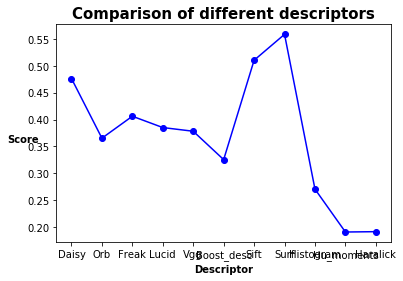

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
"""See which descriptor might be most suitable with basic LogisticRegression"""
descriptorNames = ["Daisy", "Orb", "Freak", "Lucid", "Vgg", "Boost_desc", "Sift", "Surf", "Histogram", "Hu_moments", "Haralick"]
trainDataPerName = {}
trainDataPerName["Daisy"] = train_data_daisy
trainDataPerName["Orb"] = train_data_orb
trainDataPerName["Freak"] = train_data_freak
trainDataPerName["Lucid"] = train_data_lucid
trainDataPerName["Vgg"] = train_data_vgg
trainDataPerName["Boost_desc"] = train_data_boost_desc
trainDataPerName["Sift"] = train_data_sift
trainDataPerName["Surf"] = train_data_surf
trainDataPerName["Histogram"] = train_data_histogram
trainDataPerName["Hu_moments"] = train_data_hu_moments
trainDataPerName["Haralick"] = train_data_haralick

trainLabelsPerName = {}
trainLabelsPerName["Daisy"] = train_labels_daisy
trainLabelsPerName["Orb"] = train_labels_orb
trainLabelsPerName["Freak"] = train_labels_freak
trainLabelsPerName["Lucid"] = train_labels_lucid
trainLabelsPerName["Vgg"] = train_labels_vgg
trainLabelsPerName["Boost_desc"] = train_labels_boost_desc
trainLabelsPerName["Sift"] = train_labels_sift
trainLabelsPerName["Surf"] = train_labels_surf
trainLabelsPerName["Histogram"] = train_labels_histogram
trainLabelsPerName["Hu_moments"] = train_labels_hu_moments
trainLabelsPerName["Haralick"] = train_labels_haralick

scoring = 'accuracy'
result = []
kfold = KFold(n_splits=10, random_state=7)
for key in trainDataPerName.keys():
    print(key)
    cv = cross_val_score(LogisticRegression(), trainDataPerName[key], trainLabelsPerName[key], cv=kfold, scoring=scoring).mean()
    result.append(cv)
    print(cv)
    
plt.figure()
titlepar = {'weight' : 'bold',
        'size' : '15'}
ypara = {'weight' : 'bold',
         'rotation' : '0',}
xpara = {'weight' : 'bold'}
plt.title("Comparison of different descriptors",**titlepar)
plt.xlabel("Descriptor", **xpara)
plt.ylabel("Score", **ypara).set_position([-1, 0.45])
plt.plot(descriptorNames, result, 'o-', color="b")
plt.xticks(rotation=45)
plt.show()

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn import svm
"""See which descriptor might be most suitable with SVC"""
descriptorNames = ["Daisy", "Orb", "Freak", "Lucid", "Vgg", "Boost_desc", "Sift", "Surf", "Histogram", "Hu_moments", "Haralick"]
trainDataPerName = {}
trainDataPerName["Daisy"] = train_data_daisy
trainDataPerName["Orb"] = train_data_orb
trainDataPerName["Freak"] = train_data_freak
trainDataPerName["Lucid"] = train_data_lucid
trainDataPerName["Vgg"] = train_data_vgg
trainDataPerName["Boost_desc"] = train_data_boost_desc
trainDataPerName["Sift"] = train_data_sift
trainDataPerName["Surf"] = train_data_surf
trainDataPerName["Histogram"] = train_data_histogram
trainDataPerName["Hu_moments"] = train_data_hu_moments
trainDataPerName["Haralick"] = train_data_haralick

trainLabelsPerName = {}
trainLabelsPerName["Daisy"] = train_labels_daisy
trainLabelsPerName["Orb"] = train_labels_orb
trainLabelsPerName["Freak"] = train_labels_freak
trainLabelsPerName["Lucid"] = train_labels_lucid
trainLabelsPerName["Vgg"] = train_labels_vgg
trainLabelsPerName["Boost_desc"] = train_labels_boost_desc
trainLabelsPerName["Sift"] = train_labels_sift
trainLabelsPerName["Surf"] = train_labels_surf
trainLabelsPerName["Histogram"] = train_labels_histogram
trainLabelsPerName["Hu_moments"] = train_labels_hu_moments
trainLabelsPerName["Haralick"] = train_labels_haralick

clfplot = svm.SVC(kernel='linear', C = 1.0, probability=True)
scoring = 'accuracy'
result = []
kfold = KFold(n_splits=10, random_state=7)
for key in trainDataPerName.keys():
    print(key)
    cv = cross_val_score(clfplot, trainDataPerName[key], trainLabelsPerName[key], cv=kfold, scoring=scoring).mean()
    result.append(cv)
    print(cv)
    
plt.figure()
titlepar = {'weight' : 'bold',
        'size' : '15'}
ypara = {'weight' : 'bold',
         'rotation' : '0',}
xpara = {'weight' : 'bold'}
plt.title("Comparison of different descriptors",**titlepar)
plt.xlabel("Descriptor", **xpara)
plt.ylabel("Score", **ypara).set_position([-1, 0.45])
plt.plot(descriptorNames, result, 'o-', color="b")
plt.xticks(rotation=45)
plt.show()

Daisy


KeyboardInterrupt: 

In [15]:
train_data = []
test_data = []
train_labels = train_labels_freak
for i in range(len(train_data_freak)):
    train_data.append(list(train_data_sift[i]) + list(train_data_freak[i]) + list(train_data_daisy[i]) + list(train_data_lucid[i]) + list(train_data_orb[i]) + list(train_data_vgg[i]) + list(train_data_boost_desc[i]) + list(train_data_surf[i]) + list(train_data_haralick[i]) +  list(train_data_hu_moments[i]) +  list(train_data_histogram[i]))

for i in range(len(test_data_freak)):
    test_data.append(list(test_data_sift[i]) + list(test_data_freak[i]) + list(test_data_daisy[i]) + list(test_data_lucid[i]) + list(test_data_orb[i]) + list(test_data_vgg[i]) + list(test_data_boost_desc[i]) + list(test_data_surf[i]) + list(test_data_haralick[i]) +  list(test_data_hu_moments[i]) +  list(test_data_histogram[i]))

AttributeError: 'list' object has no attribute 'shape'

ready


In [16]:
"""function to split augmented data"""
from sklearn.model_selection import train_test_split
def splitData(X, y, test_size = 0.3):
    indices = list(range(len(X[0::4])))
    train_indices, test_indices, _, _ = train_test_split(indices, y[0::4], test_size = test_size, stratify=y[0::4])

    X_train = []
    y_train = []
    X_test = []
    y_test = []
    
    for i in train_indices:
        X_train.extend(X[4*i:4*(i+1)])
        y_train.extend(y[4*i:4*(i+1)])
    for j in test_indices:
        X_test.extend(X[4*j:4*(j+1)])
        y_test.extend(y[4*j:4*(j+1)])
        
    p_train = np.random.permutation(len(X_train))
    p_test = np.random.permutation(len(X_test))
    
    return np.array(X_train)[p_train].tolist(), np.array(X_test)[p_test].tolist(), np.array(y_train)[p_train].tolist(), np.array(y_test)[p_test].tolist()

In [17]:
"""split augmented data"""
local_testing = True

offline_test_data = []
offline_test_labels = []
X_all = train_data
y_all = train_labels

if local_testing:
    from sklearn.model_selection import train_test_split
    train_data, offline_test_data, train_labels, offline_test_labels = splitData(train_data, train_labels, test_size=0.3)

print("ready")

ready


In [18]:
X = train_data
y = train_labels
if local_testing:
    X_test = offline_test_data
    y_test = offline_test_labels

In [19]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C = 1.0, probability=True)
print("ready")

ready


In [20]:
clf.fit(X,y)
print("ready")

ready


In [ ]:
"""Tune regularization parameter C"""
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
clf.get_params(deep=True)
CvaluesToTest = [1.0e-1,1.0,2.0,5.0]
tuned_parameters = [{'C': CvaluesToTest}]
kfold10 = KFold(n_splits=10, random_state=7)
CV = GridSearchCV(clf, tuned_parameters, cv=kfold10)
CV.fit(X, y)

print("Best parameter set found on development set: ",CV.best_params_)
# store the best optimization parameter for later reuse
bestC2 = CV.best_params_['C']

print("Grid scores on training data set:")
print()
cv_means = CV.cv_results_['mean_test_score']
cv_stds = CV.cv_results_['std_test_score']
for mean, std, params in zip(cv_means, cv_stds, CV.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
       
plt.figure()
titlepar = {'weight' : 'bold',
        'size' : '15'}
ypara = {'weight' : 'bold',
         'rotation' : '0',}
xpara = {'weight' : 'bold'}
plt.title("Tune regularization parameter and penalty method",**titlepar)
plt.xlabel("Value of regularization parameter C", **xpara)
plt.ylabel("Score", **ypara)
plt.plot()
plt.plot(CvaluesToTest)
plt.show()

#We'll take the default value of C=1

In [ ]:
print("b")

In [ ]:
"""Optimize amount of folds"""
from sklearn.model_selection import cross_val_score, KFold
scoring = 'accuracy'
foldsizes = [2, 5, 10]
dMean = {}
dStd = {}
names = []
results = []
for foldSize in foldsizes:
    kfold = KFold(n_splits=foldSize, random_state=7)
    cv_results = cross_val_score(clf, X, y, cv=kfold, scoring=scoring)   
    dMean[foldSize] = cv_results.mean()
    dStd[foldSize] = cv_results.std()
    results.append(cv_results)
    names.append(foldSize)
    print(foldSize)
    
minScore = {}
maxScore = {}
for key in dMean.keys():
    minScore[key] = dMean[key] - dStd[key]
    maxScore[key] = dMean[key] + dStd[key]

plt.figure()
titlepar = {'weight' : 'bold',
        'size' : '15'}
ypara = {'weight' : 'bold',
         'rotation' : '0'}
xpara = {'weight' : 'bold'}
plt.title("Tune amount of folds",**titlepar)
plt.xlabel("Amount of folds", **xpara)
plt.ylabel("Cross-validation score", **ypara).set_position([-1.5, 1.01])
plt.plot(dMean.keys(), dMean.values(), 'o-', color="b",label="Mean")
plt.plot(dMean.keys(), minScore.values(), 'o-', color="r",label="Minimum")
plt.plot(dMean.keys(), maxScore.values(), 'o-', color="g",label="Maximum")
plt.legend(loc="best")
plt.show()

#We'll take the number of folds equal to 10, the reason is that even though the mean cv-score is the same as with 5 folds,
    #the deviation from this mean only increases with 0.01, which can be neglected and the possible increase of 0.01 cv-score seems worth it.

In [22]:
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.model_selection import cross_val_predict, KFold, StratifiedKFold

if local_testing:
    y_pred = clf.predict_proba(np.array(X_test))
    y_pred_abs = clf.predict(np.array(X_test))
    
    print(sklearn.metrics.log_loss(y_test,y_pred))  #0.6699208530769415
    print(confusion_matrix(y_test,y_pred_abs))
    """[[295   0  11   0  24   8  24   7   2   8   0]
         [  4 146  18   0  30   0   5  15  18   3   0]
         [ 15  14 416   1  65   1  12  25   9   2   0]
         [  0   1   8  77   2   2   0   0   0   1   0]
         [ 11  28  55   0 457   1  19  17  13   8   0]
         [ 12   0   4   0   2 408   3   2   1   4   0]
         [ 21   6  11   1  31   3 547   3   2   1   0]
         [ 12  12  25   0  29   0  15 320  30   4   0]
         [  6  19  27   0  19   1   4  21 198   4   0]
         [ 13   2  10   0  10   1   6   1   3 472   0]
         [ 14   3   3   0   6   0   9   6   3   0  20]]
         """
    print(classification_report(y_test,y_pred_abs))
"""            precision    recall  f1-score   support

          0       0.73      0.78      0.75       379
          1       0.63      0.61      0.62       239
          2       0.71      0.74      0.72       560
          3       0.97      0.85      0.91        91
          4       0.68      0.75      0.71       609
          5       0.96      0.94      0.95       436
          6       0.85      0.87      0.86       626
          7       0.77      0.72      0.74       447
          8       0.71      0.66      0.69       299
          9       0.93      0.91      0.92       518
         10       1.00      0.31      0.48        64

avg / total       0.79      0.79      0.79      4268
"""

0.6699208530769415
[[295   0  11   0  24   8  24   7   2   8   0]
 [  4 146  18   0  30   0   5  15  18   3   0]
 [ 15  14 416   1  65   1  12  25   9   2   0]
 [  0   1   8  77   2   2   0   0   0   1   0]
 [ 11  28  55   0 457   1  19  17  13   8   0]
 [ 12   0   4   0   2 408   3   2   1   4   0]
 [ 21   6  11   1  31   3 547   3   2   1   0]
 [ 12  12  25   0  29   0  15 320  30   4   0]
 [  6  19  27   0  19   1   4  21 198   4   0]
 [ 13   2  10   0  10   1   6   1   3 472   0]
 [ 14   3   3   0   6   0   9   6   3   0  20]]
             precision    recall  f1-score   support

          0       0.73      0.78      0.75       379
          1       0.63      0.61      0.62       239
          2       0.71      0.74      0.72       560
          3       0.97      0.85      0.91        91
          4       0.68      0.75      0.71       609
          5       0.96      0.94      0.95       436
          6       0.85      0.87      0.86       626
          7       0.77      0.72      

'             precision    recall  f1-score   support\n\n          0       0.52      0.55      0.54        97\n          1       0.41      0.24      0.30        63\n          2       0.43      0.49      0.46       142\n          3       1.00      0.56      0.71        18\n          4       0.45      0.52      0.48       159\n          5       0.95      0.87      0.91       102\n          6       0.68      0.75      0.71       154\n          7       0.54      0.53      0.54       113\n          8       0.50      0.48      0.49        73\n          9       0.84      0.81      0.82       134\n         10       0.00      0.00      0.00        12\n\navg / total       0.60      0.60      0.59      1067\n'

In [29]:
"""Plot ROC"""
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_predict, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
kfold10 = KFold(n_splits=10)
def plotROC(x, y, nameofTest, test, cv):
    y_bin = label_binarize(y, classes=[0,1,2,3,4,5,6,7,8,9,10])
    n_classes = y_bin.shape[1]
    
    pipeline= Pipeline([('scaler', StandardScaler()), (nameofTest, test)])
    y_score = cross_val_predict(pipeline, x, y, cv=cv ,method='predict_proba')
    f = dict()
    t = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        f[i], t[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(f[i], t[i])
    colors =(['blue', 'red', 'green','yellow', 'black','coral','orange','cyan','peachpuff','deeppink','forestgreen'])
    
    for i, color in zip(range(n_classes), colors):
        plt.plot(f[i], t[i], color=color, lw=3,
                 label='ROC curve of class {0} (AUC = {1:0.2f})'
                 ''.format(label_strings[i], roc_auc[i]))
        
    plt.plot([0, 1], [0, 1], 'k--', lw=3)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    titlepar = {'weight' : 'bold',
            'size' : '15'}
    ypara = {'weight' : 'bold',
             'rotation' : '0',}
    xpara = {'weight' : 'bold'}
    plt.xlabel('False Positive Rate', **xpara)
    plt.ylabel('True Positive \n Rate', **ypara).set_position([-1, 0.43])
    plt.title('ROC for image classification', **titlepar)
    plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
    plt.show()

In [ ]:
kfold10 = KFold(n_splits=10)
plotROC(X, y, "Linear SVM, augmented dataset", clf, kfold10)

In [ ]:
"""Plot learning curve for accuracy"""
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve_accuracy(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    if ylim is not None:
        plt.ylim(*ylim)
    titlepar = {'weight' : 'bold',
            'size' : '15'}
    ypara = {'weight' : 'bold',
             'rotation' : '0'}
    xpara = {'weight' : 'bold'}
    plt.title(title, **titlepar)
    plt.xlabel("Amount of training images", **xpara)
    plt.ylabel("Accuracy", **ypara).set_position([-1.5, 0.45])
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.errorbar(train_sizes, train_scores_mean, yerr=train_scores_std, color = 'r', ecolor = 'r')
    plt.errorbar(train_sizes, test_scores_mean, yerr=test_scores_std, color = 'g', 
                 ecolor = 'g')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross validation score")
    plt.legend(loc="best")
    return plt



In [ ]:
kfold10 = KFold(n_splits=10)
plot_learning_curve_accuracy(clf, "Linear SVM, augmented dataset", X_all, y_all, ylim=None, cv=kfold10, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5))

In [ ]:
total_samples = len(train_data)
train_samples = np.arange(start=total_samples//10,stop=4*total_samples//5+1,step=total_samples//10)
validation_samples = total_samples//5

train_errors = np.empty((len(train_samples), 10))
validation_errors = np.empty((len(train_samples), 10))

for ids in range(len(train_samples)):
    s = train_samples[ids]
    print("ids: " + str(ids))
    for idt in range(10):
        perm = np.random.permutation(total_samples)
        x_train = [train_data[i] for i in perm[:s]]
        Y_train = train_labels[perm[:s]]
        x_validation = [train_data[i] for i in perm[s:s+validation_samples]]   
        y_validation = train_labels[perm[s:s+validation_samples]]
        clf2 = svm.SVC(kernel='linear', C = 1.0, probability=True)
        clf2.fit(x_train, Y_train)
        pred_train = clf2.predict_proba(x_train)
        pred_val = clf2.predict_proba(x_validation)
        train_errors[ids,idt] = sklearn.metrics.log_loss(Y_train, pred_train)
        validation_errors[ids,idt] = sklearn.metrics.log_loss(y_validation, pred_val)
        print("idt: " + str(idt))
        
train_mean = np.mean(train_errors, axis = 1)        
validation_mean = np.mean(validation_errors, axis = 1)        
train_std = np.std(train_errors, axis = 1)        
validation_std = np.std(validation_errors, axis = 1)        

plt.grid()
plt.errorbar(train_samples, train_mean, yerr=train_std, color = 'r', ecolor = 'r')
plt.errorbar(train_samples, validation_mean, yerr=validation_std, color = 'g', 
             ecolor = 'g')
plt.fill_between(train_samples, train_mean - train_std,
                 train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_samples, validation_mean - validation_std,
                 validation_mean + validation_std, alpha=0.1, color="g")
titlepar = {'weight' : 'bold',
        'size' : '15'}
ypara = {'weight' : 'bold',
         'rotation' : '0'}
xpara = {'weight' : 'bold'}
plt.title("Learning curve: Linear SVM, standard dataset",**titlepar)
plt.xlabel("Number of training_samples", **xpara)
plt.ylabel("Logloss", **ypara).set_position([-1.5, 1.01])
plt.title("Learning curve: Linear SVM, augmented dataset")
plt.plot(train_samples, train_mean, 'o-', color="r",
             label="Training logloss")
plt.plot(train_samples, validation_mean, 'o-', color="g",
         label="Cross validation logloss")
plt.legend(loc="best")
plt.show()


In [ ]:
"""Confusion matrix"""
import itertools
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

def plot_conf_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    titlepar = {'weight' : 'bold',
            'size' : '20'}
    ypara = {'weight' : 'bold',
             'rotation' : '0',
             'size' : '14'}
    xpara = {'weight' : 'bold',
             'size' : '14'}
    plt.ylabel('True label', **ypara)
    plt.xlabel('Predicted label', **xpara)
    plt.title(title, **titlepar)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, weight='bold')
    plt.yticks(tick_marks, classes, weight = 'bold')

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()

def plot_confusion_matrix(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_true = y_test
    y_pred = model.predict(x_test)
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_true, y_pred)
    np.set_printoptions(precision=2)
    
    # Plot non-normalized confusion matrix
    plt.figure(figsize = (20, 20))
    plot_conf_matrix(cnf_matrix, classes=label_strings,
                          title='Confusion matrix (%)')
    
    # Plot normalized confusion matrix
    plt.figure(figsize = (20, 20))
    plot_conf_matrix(cnf_matrix, classes=label_strings, normalize=True,
                          title='Normalized onfusion matrix')

In [ ]:
plot_confusion_matrix(clf, X, y, offline_test_data, offline_test_labels)

In [23]:
predictions = clf.predict_proba(np.array(test_data))
predictions = predictions.tolist()

In [24]:
# Build a submission
pred_file_path = os.path.join(PREDICTION_PATH, helpers.generateUniqueFilename('Linear SVM, augmented dataset','csv'))
helpers.writePredictionsToCsv(predictions,pred_file_path,label_strings)
print("ready")

#KAGGLE:
    #1.40020

ready


In [48]:
"""Feature selection"""
"""Forward selection"""
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import cross_val_score
codebook_size = 700
f = np.zeros(500)
kfold10 = KFold(n_splits=10, random_state=7)

for i in range(codebook_size):
    selector = SelectKBest(chi2, k=i+1).fit(X, y)
    x_new=selector.transform(X)
    model = clf
    f[i] = cross_val_score(model, x_new, y, cv=kfold10).mean()
    print("Average accuracy with ",i+1," features: ",f[i])

plt.figure()
titlepar = {'weight' : 'bold',
        'size' : '15'}
ypara = {'weight' : 'bold',
         'rotation' : '0'}
xpara = {'weight' : 'bold'}
plt.title("Forward feature selection",**titlepar)
plt.xlabel("Amount of features", **xpara)
plt.ylabel("Cross-validation score", **ypara).set_position([-1.5, 1.01])
plt.plot(np.arange(1.0,codebook_size+1,1.0),f)
plt.show()

best_features = np.argmax(f)
print("Optimal performance of ",f[best_features],
      ", for ",best_features+1," features")

featureSelector = SelectKBest(chi2, k=best_features+1).fit(X, y)
selector_modelForward = clf
selector_modelForward.fit(featureSelector.transform(X), y)
kfold10 = KFold(n_splits=10, random_state=7)
scoreslin = cross_val_score(selector_modelForward, featureSelector.transform(X), y, cv=kfold10)
print("Average CV accuracy of linear model: ",scoreslin.mean(),", stdev: ",scoreslin.std())

pred_select = selector_modelForward.predict(featureSelector.transform(X_test))

train_score_select = selector_modelForward.score(featureSelector.transform(X), y)
test_score_select = selector_modelForward.score(featureSelector.transform(x_test), y_test)

print("Accuracy of final model: ",train_score_select,
  " (train), ",test_score_select," (test)")


#We'll take 500 features/components to perform PCA

Average accuracy with  1  features:  0.1562718616401088
Average accuracy with  2  features:  0.1679233061277367
Average accuracy with  3  features:  0.17635866044824458
Average accuracy with  4  features:  0.22016129032258064
Average accuracy with  5  features:  0.22337414172820313
Average accuracy with  6  features:  0.22337414172820313
Average accuracy with  7  features:  0.2257951159476616
Average accuracy with  8  features:  0.2257967353284104
Average accuracy with  9  features:  0.22820637388262727
Average accuracy with  10  features:  0.2261983417541132
Average accuracy with  11  features:  0.26958317139525845
Average accuracy with  12  features:  0.2715928229045213
Average accuracy with  13  features:  0.2776201580515611
Average accuracy with  14  features:  0.27882497732866957
Average accuracy with  15  features:  0.282037828734292
Average accuracy with  16  features:  0.28123299650213757
Average accuracy with  17  features:  0.28122975774064
Average accuracy with  18  features

KeyboardInterrupt: 

In [25]:
"""PCA"""
from sklearn.decomposition import PCA
pca = PCA(n_components = 500)
train_dataPCA = pca.fit_transform(X_all)
train_labelsPCA = y_all
print("ready")

ready


ids: 0
idt: 0
idt: 1
idt: 2
idt: 3
idt: 4
idt: 5
idt: 6
idt: 7
idt: 8
idt: 9
ids: 1
idt: 0
idt: 1
idt: 2
idt: 3
idt: 4
idt: 5
idt: 6
idt: 7
idt: 8
idt: 9
ids: 2
idt: 0
idt: 1
idt: 2
idt: 3
idt: 4
idt: 5
idt: 6
idt: 7
idt: 8
idt: 9
ids: 3
idt: 0
idt: 1
idt: 2
idt: 3
idt: 4
idt: 5
idt: 6
idt: 7
idt: 8
idt: 9
ids: 4
idt: 0
idt: 1
idt: 2
idt: 3
idt: 4
idt: 5
idt: 6
idt: 7
idt: 8
idt: 9
ids: 5
idt: 0
idt: 1
idt: 2
idt: 3
idt: 4
idt: 5
idt: 6
idt: 7
idt: 8
idt: 9
ids: 6
idt: 0
idt: 1
idt: 2
idt: 3
idt: 4
idt: 5
idt: 6
idt: 7
idt: 8
idt: 9
ids: 7
idt: 0
idt: 1
idt: 2
idt: 3
idt: 4
idt: 5
idt: 6
idt: 7
idt: 8
idt: 9


<IPython.core.display.Javascript object>


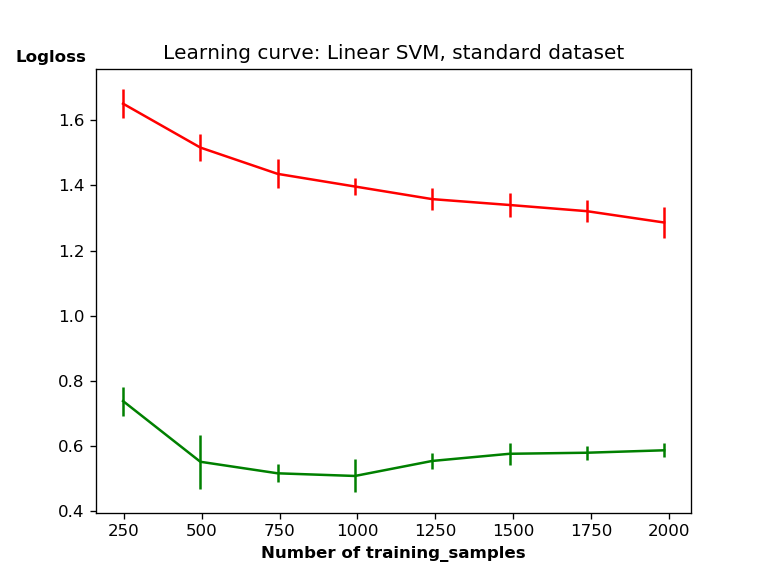

In [26]:
local_testingPCA = True

offline_test_dataPCA = []
offline_test_labelsPCA = []
X_allPCA = train_dataPCA
y_allPCA = train_labelsPCA

if local_testingPCA:
    from sklearn.model_selection import train_test_split
    x_train_dataPCA, offline_test_dataPCA, y_train_labelsPCA, offline_test_labelsPCA = splitData(X_allPCA, y_allPCA, test_size=0.3)

In [27]:
clfPCA = svm.SVC(kernel='linear', C = 1.0, probability=True)
clfPCA.fit(x_train_dataPCA, y_train_labelsPCA)
print("ready")

ready


<IPython.core.display.Javascript object>


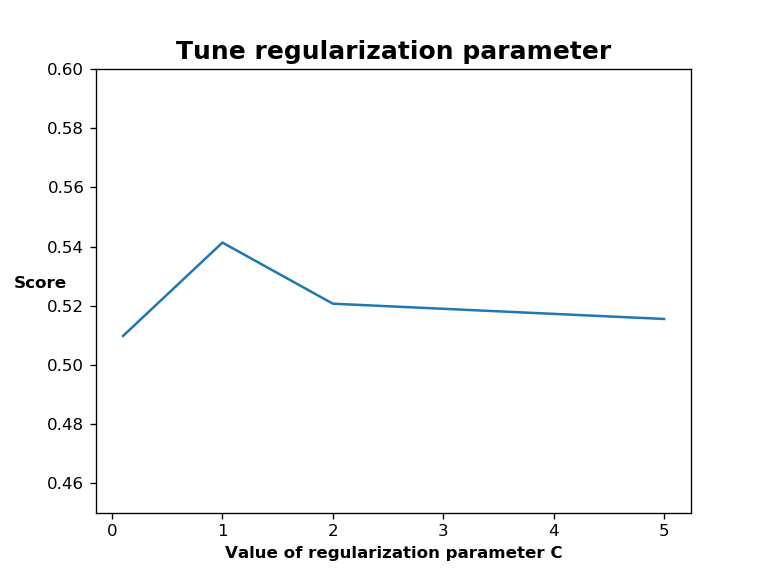

<IPython.core.display.Javascript object>


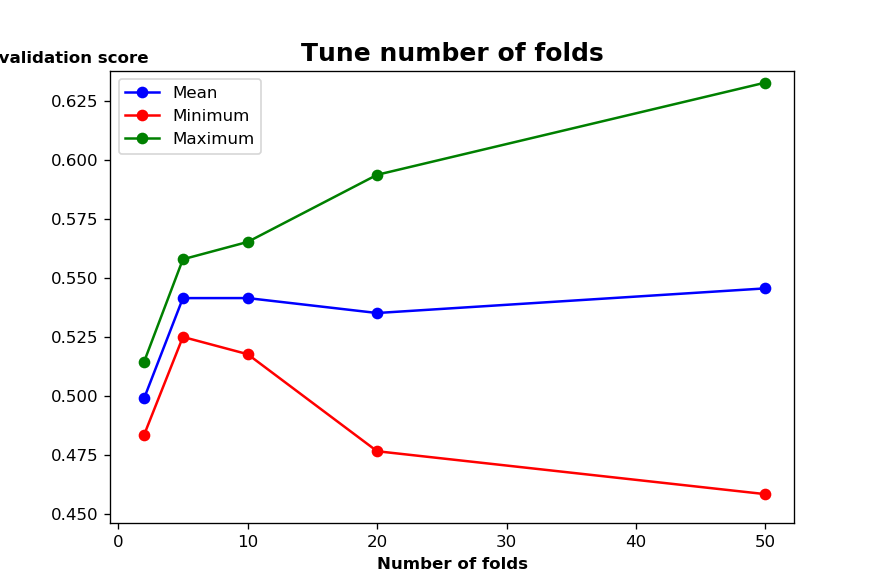

In [28]:
from sklearn.metrics import classification_report, confusion_matrix  

if local_testing:
    y_pred = clfPCA.predict_proba(np.array(offline_test_dataPCA))
    y_pred_abs = clfPCA.predict(np.array(offline_test_dataPCA))
    
    print(sklearn.metrics.log_loss(offline_test_labelsPCA,y_pred))  #0.919117214493375
    print(confusion_matrix(offline_test_labelsPCA,y_pred_abs))
    print(classification_report(offline_test_labelsPCA,y_pred_abs))

#as our cv score is about the same or even slightly worse than without PCA, this will be left out of the equation.

0.919117214493375
[[277   3  11   0  21  13  47  11   3  10   0]
 [  2  88  23   1  48   0   3  22  23   1   0]
 [ 17  25 350   1  73   4  25  26  23   2   1]
 [  1   2  15  72   0   0   2   0   0   2   0]
 [ 29  40  90   2 381   2  40  28  20   9   3]
 [ 19   1   3   2   5 384   8   1   0   7   0]
 [ 28   5  18   0  40   2 482  12   1  10   2]
 [  6  21  36   2  43   1  29 284  42   3   0]
 [  6  30  29   1  31   4   6  37 136   8   0]
 [ 14   3  11   0   9   4  13   3   2 459   0]
 [ 18   0   6   0  12   0   8   0   5   1  23]]
             precision    recall  f1-score   support

          0       0.66      0.70      0.68       396
          1       0.40      0.42      0.41       211
          2       0.59      0.64      0.61       547
          3       0.89      0.77      0.82        94
          4       0.57      0.59      0.58       644
          5       0.93      0.89      0.91       430
          6       0.73      0.80      0.76       600
          7       0.67      0.61      0

'          precision    recall  f1-score   support\n\n          0       0.47      0.52      0.49        92\n          1       0.28      0.26      0.27        62\n          2       0.44      0.48      0.46       143\n          3       0.84      0.64      0.73        25\n          4       0.39      0.43      0.41       152\n          5       0.94      0.88      0.91       112\n          6       0.63      0.70      0.67       151\n          7       0.56      0.51      0.53       106\n          8       0.57      0.41      0.48        86\n          9       0.79      0.79      0.79       126\n         10       0.11      0.08      0.10        12\n\navg / total       0.58      0.57      0.57      1067\n'